In [12]:
 #LOwess

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression

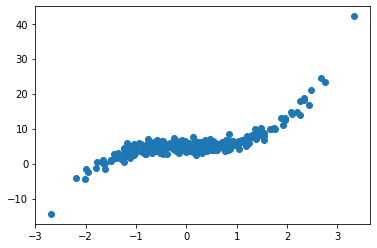

In [2]:
#Generation of Data
std=1
u=0
a=(np.random.randn(300)*std +u)
noise=(np.random.randn(300))
b=a**3 + 5 + noise 
plt.figure 
plt.scatter(a,b)

In [3]:
def getw(a,queryx,tau):
    m=a.shape[0]
    w=np.mat(np.eye(m))
    
    for i in range(m):
        x=queryx
        w[i,i]=np.exp(np.dot((a[i]-x),(a[i]-x).T)/(-2*tau*tau))
        
    return w     

In [4]:
a=a.reshape((-1,1))
b=b.reshape((-1,1))
a=np.mat(a)
b=np.mat(b)
m=a.shape[0]

w=getw(a,1,1)
print(w)

[[0.54786455 0.         0.         ... 0.         0.         0.        ]
 [0.         0.90003287 0.         ... 0.         0.         0.        ]
 [0.         0.         0.67590808 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.9056521  0.         0.        ]
 [0.         0.         0.         ... 0.         0.03154999 0.        ]
 [0.         0.         0.         ... 0.         0.         0.92512906]]


In [5]:
def prediction(a,b,query,tau):
    m=a.shape[0]
    ones=np.ones((m,1))
    a_=np.hstack((a,ones))
    
    qx=np.mat([query,1])
    w=getw(a_,qx,tau)
    
    theta=np.linalg.pinv(a_.T*(w*a_))*(a_.T*(w*b))
    
    pred=np.dot(qx,theta)
    
    return theta,pred

theta,pred=prediction(a,b,2,1)
print(theta)
print(pred)

[[5.3545926]
 [2.3866216]]
[[13.09580679]]


In [6]:
#plot of prediction
def plotpred(tau):
    
    x_test=np.linspace(-3,3,50)
    y_test=[]
    
    for i in x_test:
        theta,pred=prediction(a,b,i,tau)
        y_test.append(pred)
        
    y_test=np.array(y_test)
    aa=np.array(a)
    bb=np.array(b)
    
    plt.figure()
    plt.scatter(aa,bb)
    plt.scatter(x_test,y_test,c='red')        

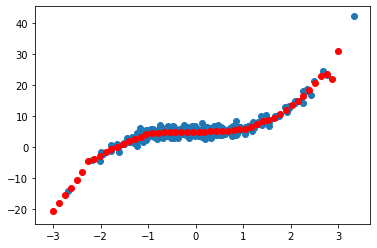

In [7]:
plotpred(0.1)